In [1]:
# import the necessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns ; sns.set()
%matplotlib inline

# import the datafraame

data = pd.read_csv("bank_notes.csv")
data.dropna()
print(data.describe())

                V1           V2
count  1372.000000  1372.000000
mean      0.433735     1.922353
std       2.842763     5.869047
min      -7.042100   -13.773100
25%      -1.773000    -1.708200
50%       0.496180     2.319650
75%       2.821475     6.814625
max       6.824800    12.951600


In [2]:
# elaborating the data
x = data["V1"]
y = data["V2"]
x_min  = x.min()
x_max = x.max()

y_min = y.min()
y_max = y.max()

print("x_min =", x.min())
print("y_min =",y.min())
print("x_max =",x.max())
print("y_max =",y.max())
# calulation the mean and standerd deviation of th data

x_mean = x.mean()
y_mean = y.mean()

x_std = x.std()
y_std = y.std()
print()
print("x_mean = ",x_mean)
print("X_std =",x_std)
print("y_mean =",y_mean)
print("y_std =",y_std)

x_min = -7.0421
y_min = -13.7731
x_max = 6.8248
y_max = 12.9516

x_mean =  0.43373525728862977
X_std = 2.8427625862451658
y_mean = 1.9223531209912539
y_std = 5.869046743580378


In [3]:
x_nor = (x-x_min)/(x_max-x_min)
y_nor = (y-y_min)/(y_max-y_min)
D = np.column_stack((x_nor,y_nor))

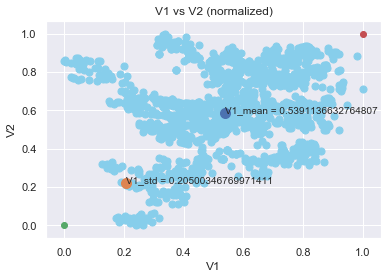

In [4]:
plt.scatter(x_nor,y_nor,c = "skyblue",s = 50)
plt.scatter(x_nor.mean(),y_nor.mean(),s = 100)
plt.text(x_nor.mean(),y_nor.mean(),"V1_mean = "+str(x_nor.mean()))
plt.scatter(x_nor.std(),y_nor.std(),s = 100)
plt.text(x_nor.std(),y_nor.std(),"V1_std = "+str(x_nor.std()))
plt.scatter(x_nor.min(),y_nor.min())
plt.scatter(x_nor.max(),y_nor.max())
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("V1 vs V2 (normalized)")
plt.savefig("D:\\temp\\myfig1.png")
plt.show()

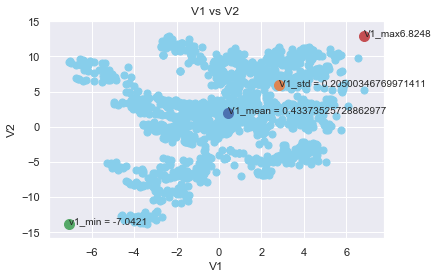

In [6]:
plt.scatter(x,y,c = "skyblue",s = 50)
plt.scatter(x.mean(),y.mean(),s = 100)
plt.text(x.mean(),y.mean(),"V1_mean = "+str(x.mean()))
plt.scatter(x.std(),y.std(),s = 100)
plt.text(x.std(),y.std(),"V1_std = "+str(x_nor.std()))
plt.scatter(x.min(),y.min(),s=100)
plt.text(x.min(),y.min(),"v1_min = "+str(x_min))
plt.scatter(x.max(),y.max(),s=100)
plt.text(x.max(),y.max(),'V1_max'+str(x_max))
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("V1 vs V2 ")
plt.savefig("D:\\temp\\myfigg.png")
plt.show()

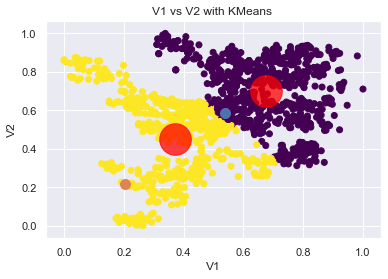

In [5]:
kmeans = KMeans(n_clusters=2,max_iter=10000)
labels = kmeans.fit(D).predict(D)
center = kmeans.cluster_centers_
plt.scatter(x_nor,y_nor,c=labels,cmap="viridis")
plt.scatter(center[:,0],center[:,1],c="red",s = 1000,alpha=0.75)
plt.scatter(x_nor.mean(),y_nor.mean(),s = 100)
plt.scatter(x_nor.std(),y_nor.std(),s = 100)
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("V1 vs V2 with KMeans ")
plt.savefig("D:\\temp\\myfig.png")
plt.show()

In [6]:
'''
Another method to plot

xval_0=[]
yval_0=[]
xval_1=[]
yval_1=[]

for i in range(0,x.size):
    if(res.labels_[i] == 0):
        xval_0.append(x_nor[i])
        yval_0.append(y_nor[i])
    else:
        xval_1.append(x_nor[i])
        yval_1.append(y_nor[i])

#Plotting the values and cluster centres
plt.scatter(xval_0,yval_0,c="skyblue")
plt.scatter(xval_1,yval_1,c="orange")
plt.scatter(clusters[:,0],clusters[:,1],c="black",s = 1000,alpha=0.5)
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

'''

'\nAnother method to plot\n\nxval_0=[]\nyval_0=[]\nxval_1=[]\nyval_1=[]\n\nfor i in range(0,x.size):\n    if(res.labels_[i] == 0):\n        xval_0.append(x_nor[i])\n        yval_0.append(y_nor[i])\n    else:\n        xval_1.append(x_nor[i])\n        yval_1.append(y_nor[i])\n\n#Plotting the values and cluster centres\nplt.scatter(xval_0,yval_0,c="skyblue")\nplt.scatter(xval_1,yval_1,c="orange")\nplt.scatter(clusters[:,0],clusters[:,1],c="black",s = 1000,alpha=0.5)\nplt.xlabel("V1")\nplt.ylabel("V2")\nplt.show()\n\n'

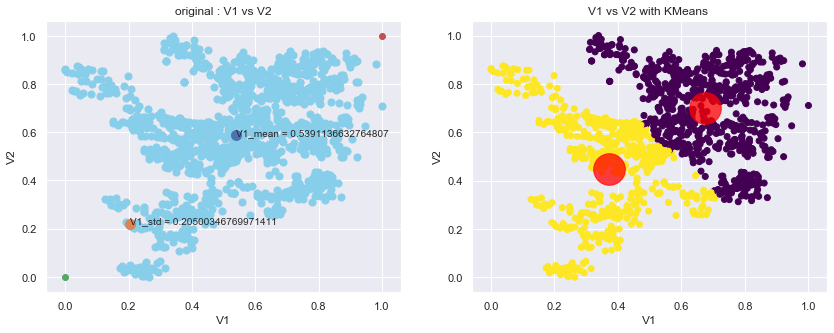

In [7]:
fig ,(ax1,ax2) = plt.subplots(1,2, figsize = (14,5))
ax1.scatter(x_nor,y_nor,c = "skyblue",s = 50)
ax1.scatter(x_nor.mean(),y_nor.mean(),s = 100)
ax1.text(x_nor.mean(),y_nor.mean(),"V1_mean = "+str(x_nor.mean()))
ax1.scatter(x_nor.std(),y_nor.std(),s = 100)
ax1.text(x_nor.std(),y_nor.std(),"V1_std = "+str(x_nor.std()))
ax1.scatter(x_nor.min(),y_nor.min())
ax1.scatter(x_nor.max(),y_nor.max())
ax1.set_xlabel("V1")
ax1.set_ylabel("V2")
ax1.set_title("original : V1 vs V2")
ax2.scatter(x_nor,y_nor,c=labels,cmap="viridis")
ax2.scatter(center[:,0],center[:,1],c="red",s = 1000,alpha=0.75)
ax2.set_xlabel("V1")
ax2.set_ylabel("V2")
ax2.set_title("V1 vs V2 with KMeans ")
plt.show()

In [8]:
np.size()

1372